In [505]:
import pandas as pd
import numpy as np 

import itertools
from sklearn.linear_model import SGDRegressor
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.preprocessing import PolynomialFeatures

In [488]:
np.random.seed(3116)

<b> Exercise 0-- <b>
<b>Generating D1 Dataset<b>

In [494]:
np.random.seed(3116)
D1 = np.random.normal(1, 0.05, 100)
r = np.random.rand()
print(r)
function_y = lambda x : 1.3* (x**2) + 4.8*(x) + 8 +r
y = function_y(x)

print(D1)






0.5442624122619674
[0.99526708 1.00975643 0.9902751  0.98921667 1.02855355 0.99297211
 0.94841123 1.04048064 0.96237656 0.95696986 1.04102862 1.01969218
 1.03525446 1.00493024 0.97444795 0.98013086 1.01435173 0.98126587
 0.9022223  1.10396183 0.95975051 1.04174774 0.99490866 0.95999958
 0.9273906  0.98819527 1.05431913 0.9236436  1.08737406 0.89057321
 1.01599445 1.02271972 1.01767771 0.95595606 0.96904433 0.94751388
 1.01208692 0.91759453 1.03667332 1.01563695 0.99534661 0.96125517
 1.02174883 0.99473729 1.05301825 1.1137125  1.03213772 1.03170677
 1.05802012 1.00803324 1.04269146 1.03926963 1.03402696 1.02974745
 0.95783589 0.94085187 0.94993268 0.92055744 1.02776776 0.94116263
 1.07181329 0.97825356 0.92895897 1.10578465 0.96968977 1.10883769
 1.02368635 0.97666991 1.06034097 1.08392066 1.00515072 0.97362402
 0.96252906 1.02922125 1.00380999 1.07019155 1.03574878 0.98218251
 0.95240501 1.04516162 0.98719144 0.93688636 1.00768735 1.09367221
 1.01259665 0.98347729 0.93003332 0.9937074

In [508]:
D2 =pd.read_csv("winequality-red.csv", delimiter =";")
list_cloumn_names = ['fixed acidity','volatile acidity','citric acid','residual sugar','chlorides','free sulfur dioxide','total sulfur dioxide','density','pH','sulphates','alcohol']
print(list_cloumn_names)
def normalize_data(list_cloumn_names):
 for x in list_cloumn_names :
    mean = D2.mean(axis =0)[x]
    std  = D2.std(axis = 0)[x]
    D2[x] = D2[x].map(lambda x: (x - mean)/std )

normalize_data(list_cloumn_names)
D2.head()
D2.describe()

['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1.599000e+03,1.599000e+03,1.599000e+03,1.599000e+03,1.599000e+03,1.599000e+03,1.599000e+03,1.599000e+03,1.599000e+03,1.599000e+03,1.599000e+03,1599.000000
mean,-1.570643e-14,-1.590973e-15,6.045057e-15,-1.344696e-15,5.098590e-15,-7.724347e-17,1.619856e-16,3.772732e-13,-5.937923e-15,-2.175036e-15,2.580411e-14,5.636023
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.807569
min,-2.136377e+00,-2.277567e+00,-1.391037e+00,-1.162333e+00,-1.603443e+00,-1.422055e+00,-1.230199e+00,-3.537625e+00,-3.699244e+00,-1.935902e+00,-1.898325e+00,3.000000
25%,-7.004996e-01,-7.696903e-01,-9.290275e-01,-4.530767e-01,-3.711129e-01,-8.484502e-01,-7.438076e-01,-6.075656e-01,-6.549356e-01,-6.380200e-01,-8.661079e-01,5.000000
50%,-2.410190e-01,-4.367545e-02,-5.634264e-02,-2.402999e-01,-1.798892e-01,-1.792441e-01,-2.574163e-01,1.759533e-03,-7.210449e-03,-2.250577e-01,-2.092427e-01,6.000000
75%,5.056370e-01,6.264921e-01,7.650078e-01,4.340257e-02,5.382858e-02,4.899619e-01,4.721707e-01,5.766445e-01,5.757422e-01,4.238832e-01,6.352984e-01,6.000000
max,4.353787e+00,5.876138e+00,3.742403e+00,9.192806e+00,1.112355e+01,5.365606e+00,7.372847e+00,3.678904e+00,4.526866e+00,7.916200e+00,4.201138e+00,8.000000


In [312]:
def sgd_ref_type(type):
    #loss_set = ['hinge', 'log', 'modified_huber','squared_loss']  
    learning_rate = [ 'constant', 'optimal', 'invscaling', 'adaptive']
    alpha = [0.001, 0.01, 0.1, 0.1, 1, 10]
    eta0 = [0.001,0.01,0.1,1 ] 
    rmse_train =[None] * (len(learning_rate)* len(alpha)*len(eta0))
    rmse_test = [None] * (len(learning_rate)* len(alpha)*len(eta0))
    if type == 'Ordinary Least Squares':
           for i,alpha_v in enumerate(alpha):
                for j,learning_rate_v in enumerate(learning_rate):
                    for k,eta in enumerate(eta0):
                        sgd_ordinary_loss = SGDRegressor(max_iter=10000,penalty = None ,loss='squared_loss',learning_rate =learning_rate_v,eta0 = eta,alpha= alpha_v )
                        sgd_ordinary_loss.fit(X_train, y_train)
                        ordinary_pred_train = sgd_ordinary_loss.predict(X_train)
                        ordinary_pred_test = sgd_ordinary_loss.predict(X_test)
                        rmse_train[i*j+k]  = mean_squared_error(ordinary_pred_train,y_train,squared=False)
                        rmse_test[i*j+k] = mean_squared_error(ordinary_pred_test,y_test,squared=False)
                        print( "for alpha = {} and learning_rate = {} and eta0 = {}, rsme_tain ={} and rmse_test ={}".format(alpha_v,learning_rate_v,eta,rmse_train[i*j+k],rmse_test[i*j+k]) )
                        
                
        
    elif type == 'Ridge Regression':
           for i,alpha_v in enumerate(alpha):
                for j,learning_rate_v in enumerate(learning_rate):
                    for k,eta in enumerate(eta0):
                        sgd_ridge_regression = SGDRegressor(max_iter=10000, penalty = 'l2',learning_rate =learning_rate_v,eta0 = eta,alpha= alpha_v  )
                        sgd_ridge_regression.fit(X_train, y_train)
                        ridge_pred_train = sgd_ridge_regression.predict(X_train)
                        ridge_pred_test = sgd_ridge_regression.predict(X_test)
                        rmse_train[i*j+k]  = mean_squared_error(ridge_pred_train,y_train,squared=False)
                        rmse_test[i*j+k] = mean_squared_error(ridge_pred_test,y_test,squared=False)
    elif type == 'LASSO':
         for i,alpha_v in enumerate(alpha):
                for j,learning_rate_v in enumerate(learning_rate):
                    for k,eta in enumerate(eta0):
                        sgd_lasso = SGDRegressor(max_iter=10000,penalty = 'l1',learning_rate =learning_rate_v,eta0 = eta,alpha= alpha_v  )
                        sgd_lasso.fit(X_train, y_train)
                        ordinary_pred_train = sgd_lasso.predict(X_train)
                        ordinary_pred_test = sgd_lasso.predict(X_test)
                        rmse_test[i*j+k]  = mean_squared_error(ordinary_pred_train,y_train,squared=False)
                        rmse_test[i*j+k] = mean_squared_error(ordinary_pred_test,y_test,squared=False)
    return rmse_train,rmse_test      



In [509]:
x_total = D2[['fixed acidity','volatile acidity','citric acid','residual sugar','chlorides','free sulfur dioxide','total sulfur dioxide','density','pH','sulphates','alcohol']]
y_total = D2['quality']
data = D2.values
X_train, X_test, y_train, y_test = train_test_split(D2[['fixed acidity','volatile acidity','citric acid','residual sugar','chlorides','free sulfur dioxide','total sulfur dioxide','density','pH','sulphates','alcohol']], D2['quality'], test_size=0.2)
model = SGDRegressor(max_iter=100000)

#clf = GridSearchCV(model, param_grid)
#clf.fit(X_train, y_train)
#print("Best score: " + str(clf.best_score_))

rmse_train_ordinary = sgd_ref_type('Ordinary Least Squares')[0]
rmse_test_ordinary = sgd_ref_type('Ordinary Least Squares')[1]
rmse_train_reg = sgd_ref_type('Ridge Regression')[0]
rmse_test_reg = sgd_ref_type('Ridge Regression')[1]
rmse_train_lasso = sgd_ref_type('LASSO')[0]
rmse_test_lasso = sgd_ref_type('LASSO')[1]

#print (rmse_train_ordinary,rmse_test_ordinary)
#print (rmse_train_reg,rmse_test_reg)
#print (rmse_train_lasso,rmse_test_lasso)





#plt.scatter(X_train, y_train, color='black')
#plt.plot(X, clf.predict(X), color='blue', linewidth=3)
#plt.show()
#print (sgd_loss_train,sgd_loss_test,ridge_loss_train,ridge_loss_test,lasso_loss_train,lasso_loss_test,ridge_loss_train, ridge_loss_test)









for alpha = 0.001 and learning_rate = constant and eta0 = 0.001, rsme_tain =0.6552274623172153 and rmse_test =0.6188076421658893
for alpha = 0.001 and learning_rate = constant and eta0 = 0.01, rsme_tain =0.67706162742528 and rmse_test =0.6485170841595016
for alpha = 0.001 and learning_rate = constant and eta0 = 0.1, rsme_tain =134613408.6140429 and rmse_test =121289958.11799951
for alpha = 0.001 and learning_rate = constant and eta0 = 1, rsme_tain =10813810135417.549 and rmse_test =11376350050161.992
for alpha = 0.001 and learning_rate = optimal and eta0 = 0.001, rsme_tain =0.6708369197829439 and rmse_test =0.651256808461172
for alpha = 0.001 and learning_rate = optimal and eta0 = 0.01, rsme_tain =0.6941774973777908 and rmse_test =0.6369449965708303
for alpha = 0.001 and learning_rate = optimal and eta0 = 0.1, rsme_tain =0.6720323688756927 and rmse_test =0.6304250695854053
for alpha = 0.001 and learning_rate = optimal and eta0 = 1, rsme_tain =0.687105480363362 and rmse_test =0.64288034

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_stochastic_gradient.py:1187: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


for alpha = 0.1 and learning_rate = optimal and eta0 = 0.001, rsme_tain =3980.247730452507 and rmse_test =3710.8574375426406


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_stochastic_gradient.py:1187: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


for alpha = 0.1 and learning_rate = optimal and eta0 = 0.01, rsme_tain =139896.65385241152 and rmse_test =130428.66098692232


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_stochastic_gradient.py:1187: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


for alpha = 0.1 and learning_rate = optimal and eta0 = 0.1, rsme_tain =2016276.6169736558 and rmse_test =1879817.9252815912


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_stochastic_gradient.py:1187: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


for alpha = 0.1 and learning_rate = optimal and eta0 = 1, rsme_tain =4957916.388680339 and rmse_test =4622370.9821795225
for alpha = 0.1 and learning_rate = invscaling and eta0 = 0.001, rsme_tain =0.6577556924221446 and rmse_test =0.6151236813700159
for alpha = 0.1 and learning_rate = invscaling and eta0 = 0.01, rsme_tain =0.6540599654332276 and rmse_test =0.6137427812694698
for alpha = 0.1 and learning_rate = invscaling and eta0 = 0.1, rsme_tain =0.6711425702011752 and rmse_test =0.6403420298558541
for alpha = 0.1 and learning_rate = invscaling and eta0 = 1, rsme_tain =3.440763857286272 and rmse_test =3.0189299181548237
for alpha = 0.1 and learning_rate = adaptive and eta0 = 0.001, rsme_tain =0.6537028223383173 and rmse_test =0.6147468869488613
for alpha = 0.1 and learning_rate = adaptive and eta0 = 0.01, rsme_tain =0.6536547200700542 and rmse_test =0.6151447680577894
for alpha = 0.1 and learning_rate = adaptive and eta0 = 0.1, rsme_tain =1311719.4092974397 and rmse_test =1222377.7548

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_stochastic_gradient.py:1187: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


for alpha = 0.1 and learning_rate = optimal and eta0 = 0.001, rsme_tain =138.85638267401401 and rmse_test =129.47214084381417


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_stochastic_gradient.py:1187: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


for alpha = 0.1 and learning_rate = optimal and eta0 = 0.01, rsme_tain =117112.11351494692 and rmse_test =109186.11363227657


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_stochastic_gradient.py:1187: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


for alpha = 0.1 and learning_rate = optimal and eta0 = 0.1, rsme_tain =792.2194787575378 and rmse_test =738.5899155053619


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_stochastic_gradient.py:1187: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


for alpha = 0.1 and learning_rate = optimal and eta0 = 1, rsme_tain =2324.87562571843 and rmse_test =2167.5177683809793
for alpha = 0.1 and learning_rate = invscaling and eta0 = 0.001, rsme_tain =0.6577214561455353 and rmse_test =0.6154907710746899
for alpha = 0.1 and learning_rate = invscaling and eta0 = 0.01, rsme_tain =0.654035057005472 and rmse_test =0.6161387176596616
for alpha = 0.1 and learning_rate = invscaling and eta0 = 0.1, rsme_tain =0.6647199411495087 and rmse_test =0.6153322760772927
for alpha = 0.1 and learning_rate = invscaling and eta0 = 1, rsme_tain =0.9195430504947872 and rmse_test =0.8393086890371718
for alpha = 0.1 and learning_rate = adaptive and eta0 = 0.001, rsme_tain =0.6536822930310495 and rmse_test =0.6151846832391447
for alpha = 0.1 and learning_rate = adaptive and eta0 = 0.01, rsme_tain =0.653657123892078 and rmse_test =0.614877986225842
for alpha = 0.1 and learning_rate = adaptive and eta0 = 0.1, rsme_tain =0.6536644032150536 and rmse_test =0.6146706340298

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_stochastic_gradient.py:1187: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


for alpha = 0.1 and learning_rate = optimal and eta0 = 0.001, rsme_tain =1205921.3675902467 and rmse_test =1124306.2404938494


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_stochastic_gradient.py:1187: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


for alpha = 0.1 and learning_rate = optimal and eta0 = 0.01, rsme_tain =321904.5001267559 and rmse_test =300118.39630809927


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_stochastic_gradient.py:1187: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


for alpha = 0.1 and learning_rate = optimal and eta0 = 0.1, rsme_tain =270275.3343254953 and rmse_test =251983.53533824297


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_stochastic_gradient.py:1187: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


for alpha = 0.1 and learning_rate = optimal and eta0 = 1, rsme_tain =3329.0542498398854 and rmse_test =3103.7356286949835
for alpha = 0.1 and learning_rate = invscaling and eta0 = 0.001, rsme_tain =0.6578739827287816 and rmse_test =0.61535379605018
for alpha = 0.1 and learning_rate = invscaling and eta0 = 0.01, rsme_tain =0.6565859327278714 and rmse_test =0.6231606145870568
for alpha = 0.1 and learning_rate = invscaling and eta0 = 0.1, rsme_tain =0.6652799022680191 and rmse_test =0.6222576470558069
for alpha = 0.1 and learning_rate = invscaling and eta0 = 1, rsme_tain =23891993068.881317 and rmse_test =22402471056.977844
for alpha = 0.1 and learning_rate = adaptive and eta0 = 0.001, rsme_tain =0.6537080513026662 and rmse_test =0.6146740723539034
for alpha = 0.1 and learning_rate = adaptive and eta0 = 0.01, rsme_tain =0.6536585145435231 and rmse_test =0.6146477003625157
for alpha = 0.1 and learning_rate = adaptive and eta0 = 0.1, rsme_tain =167246.82023495593 and rmse_test =155919.37730

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_stochastic_gradient.py:1187: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


for alpha = 0.1 and learning_rate = optimal and eta0 = 0.001, rsme_tain =1169382.5011515017 and rmse_test =1090240.5647328773


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_stochastic_gradient.py:1187: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


for alpha = 0.1 and learning_rate = optimal and eta0 = 0.01, rsme_tain =8418.941426563295 and rmse_test =7849.14074284374


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_stochastic_gradient.py:1187: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


for alpha = 0.1 and learning_rate = optimal and eta0 = 0.1, rsme_tain =536.7466219530919 and rmse_test =500.43393938556954


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_stochastic_gradient.py:1187: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


for alpha = 0.1 and learning_rate = optimal and eta0 = 1, rsme_tain =210788.84041541393 and rmse_test =196522.69689159835
for alpha = 0.1 and learning_rate = invscaling and eta0 = 0.001, rsme_tain =0.6578203577872132 and rmse_test =0.6154281368821315
for alpha = 0.1 and learning_rate = invscaling and eta0 = 0.01, rsme_tain =0.6538592976554206 and rmse_test =0.6165727990978966
for alpha = 0.1 and learning_rate = invscaling and eta0 = 0.1, rsme_tain =0.6798361190338146 and rmse_test =0.6216764149483689
for alpha = 0.1 and learning_rate = invscaling and eta0 = 1, rsme_tain =1.3714602617832918 and rmse_test =1.1748457315233842
for alpha = 0.1 and learning_rate = adaptive and eta0 = 0.001, rsme_tain =0.6536867206061406 and rmse_test =0.6147920726684416
for alpha = 0.1 and learning_rate = adaptive and eta0 = 0.01, rsme_tain =0.6536604851311921 and rmse_test =0.6152248679728695
for alpha = 0.1 and learning_rate = adaptive and eta0 = 0.1, rsme_tain =7580.106205636773 and rmse_test =7079.562102

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_stochastic_gradient.py:1187: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_stochastic_gradient.py:1187: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_stochastic_gradient.py:1187: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_stochastic_gradient.py:1187: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-pa

<b>Tuning hyperparamters<b>

best prarams for model one: {'alpha': 0.1, 'eta0': 0.001, 'learning_rate': 'constant'}


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_stochastic_gradient.py:1187: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


best prarams for model two: {'alpha': 0.1, 'eta0': 0.001, 'learning_rate': 'constant'}
[0.37704463 0.36226895 0.35892943 0.33484551 0.36973922]
[0.13083369 0.31615508 0.3444783  0.36538004 0.28561147]
[0.37689587 0.36057704 0.35857363 0.33470929 0.36780036]
[0.14122509 0.30425613 0.34386918 0.36768395 0.30153067]


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:54: UserWarning: Legend does not support array([0.37704463, 0.36226895, 0.35892943, 0.33484551, 0.36973922]) instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:54: UserWarning: Legend does not support array([0.13083369, 0.31615508, 0.3444783 , 0.36538004, 0.28561147]) instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists


"\n  scores = cross_val_score(grid_search.best_estimator_, x_train, y_train, cv=3, scoring='accuracy')\n    print(scores.mean(), scores)\n    print('on test set')\n    scores = cross_val_score(grid_search.best_estimator_, x_test, y_test, cv=3, scoring='accuracy')\n    print(scores.mean(), scores)\n    \n"

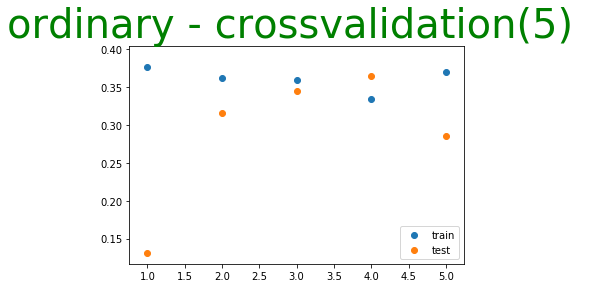

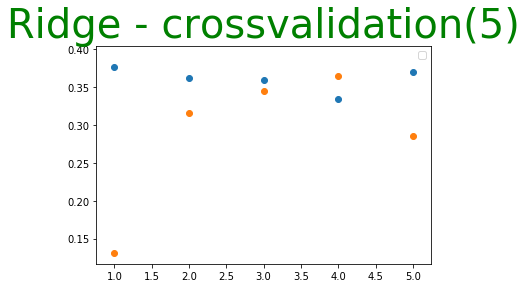

In [512]:
from sklearn.model_selection import cross_validate
param_grid = {

   'learning_rate' :[ 'constant', 'optimal', 'invscaling', 'adaptive'],
    'alpha':[0.001, 0.01, 0.1,1],
    'eta0' :[0.001,0.01,0.1,1 ],
}
model_1 = SGDRegressor(max_iter=100000,loss = 'squared_loss' )
model_2 = SGDRegressor(max_iter=100000, penalty = 'l2' )
#model_3 = SGDRegressor(max_iter=500000, penalty ='l1')
model_1_tuned = GridSearchCV(model_1, param_grid)
model_2_tuned = GridSearchCV(model_2, param_grid)
#model_3_tuned = GridSearchCV(model_3, param_grid)

model_1_tuned.fit(X_train, y_train)
print('best prarams for model one:', model_1_tuned.best_params_)
model_2_tuned.fit(X_train, y_train)
print('best prarams for model two:', model_2_tuned.best_params_)
#model_3_tuned.fit(X_train, y_train)
#print('best prarams for model three:', model_3_tuned.best_params_)

cv_results_ord = cross_validate(model_1, x_total, y_total, cv=5,return_train_score=True)
cv_results_reg = cross_validate(model_2, x_total, y_total, cv=5,return_train_score=True)
#cv_results_lsso = cross_validate(model_3, x_total, y_total, cv=5,return_train_score=True)
print(cv_results_ord['train_score'])
print (cv_results_ord['test_score'])
print (cv_results_reg['train_score'])
print (cv_results_reg['test_score'])
#------------------------------------------------
x_graph = [1,2,3,4,5]
y_ord_train = cv_results_ord['train_score']
y_ord_test = cv_results_ord['test_score']

#---------------------------------------------------------
plot1 = plt.figure(1) 

plt.title(label="ordinary - crossvalidation(5) ", 
          fontsize=40, 
          color="green") 
ord_train = plt.scatter(x_graph,y_ord_train )
ord_test = plt.scatter(x_graph,y_ord_test )

plt.legend([ord_train, ord_test], ['train', 'test'])

plot2 = plt.figure(2) 

plt.title(label="Ridge - crossvalidation(5)", 
          fontsize=40, 
          color="green") 
Ridge_train = plt.scatter(x_graph,y_ord_train )
Ridge_test = plt.scatter(x_graph,y_ord_test )
y_ridge_train = cv_results_ord['train_score']
y_ridge_test = cv_results_ord['test_score']
plt.legend([y_ridge_train, y_ridge_test], ['train', 'test'])


#print("Best score: " + str(model_1_tuned.best_score_))
#print("Best score: " + str(model_2_tuned.best_score_))
#print("Best score: " + str(model_3_tuned.best_score_))

'''
  scores = cross_val_score(grid_search.best_estimator_, x_train, y_train, cv=3, scoring='accuracy')
    print(scores.mean(), scores)
    print('on test set')
    scores = cross_val_score(grid_search.best_estimator_, x_test, y_test, cv=3, scoring='accuracy')
    print(scores.mean(), scores)
    
'''    

<b>optimal hyperparamters <b> 

In [511]:
print("the score for model 1 tuned is {}".format(model_1_tuned.score(X_test,y_test)))
print("the score for model 2 tuned is {}".format(model_2_tuned.score(X_test,y_test) ))



the score for model 1 tuned is 0.3415565794088634
the score for model 2 tuned is 0.34735560391033216


Adding bias in our trianing_data_Set

<b> Eercise 2 Higher Order Polynomial Regression <b>

this is pred{} [14.4865757  14.52057455 14.60544786 14.75916164 14.75365035 14.36515422
 14.58859716 14.59633877 14.69232581 14.61543937 14.70107505 14.62889171
 14.71418184 14.44875796 14.56956737 14.38618297 14.59460115 14.49048156
 14.58542892 14.59823765]
this is the degree 1, train score = 0.06212901234487067, test_score = -0.48868007864677687
this is pred{} [14.48826681 14.5053451  14.5834407  14.85378523 14.84122129 14.49360537
 14.56390676 14.57263325 14.71582806 14.59596588 14.73210122 14.61393803
 14.7574861  14.47881648 14.54424672 14.48526038 14.5706379  14.48981566
 14.56045695 14.57483804]
this is the degree 2, train score = 0.07060064474157546, test_score = -0.48169819160339666
this is pred{} [14.44038699 14.46176944 14.6066371  14.8511251  14.83583555 11.89575265
 14.59368847 14.60052917 14.7048975  14.61185155 14.72425256 14.61851201
 14.75335703 14.55801079 14.56822453 13.75769112 14.59914348 14.4368696
 14.59035001 14.60195384]
this is the degree 7, train score = 0.0

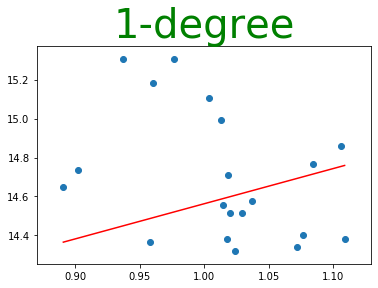

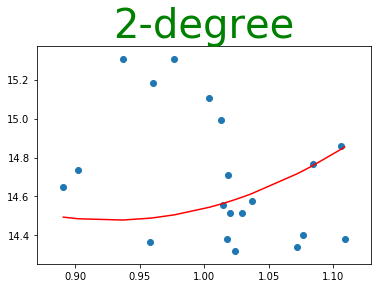

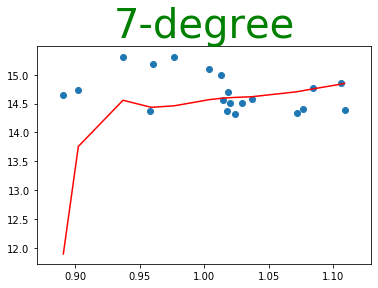

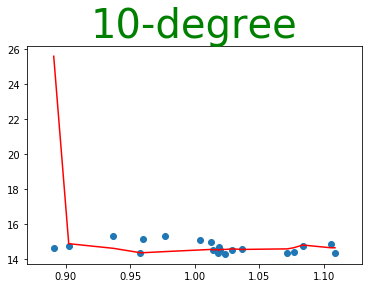

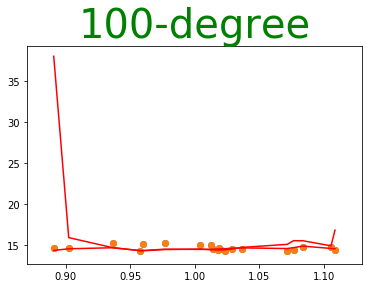

In [506]:
X_train_p, X_test_p, y_train_p, y_test_p = train_test_split(D1,y,test_size = 0.2)
list_degrees = [1,2,7,10,16,100]
pred_values ={}

#x_poly = 
model = LinearRegression()
for i in list_degrees:
    x_poly_f = PolynomialFeatures(degree=i)
    x_poly = x_poly_f.fit_transform(X_train_p.reshape(-1,1))
    x_test = x_poly_f.fit_transform(X_test_p.reshape(-1,1))
    model.fit(x_poly,y_train_p)
    pred = model.predict(x_test)
    print("this is pred{}",pred)
    pred_values[i] = pred.transpose()
    train_score = model.score( x_poly,y_train_p)
    test_score = model.score(x_test,y_test_p)
    print ("this is the degree {}, train score = {}, test_score = {}".format(i,train_score,test_score))
    
    

#print (pred_values[1][0])
print("this is the real y_test = {}".format( y_test_p))
print("this is the prediction = {}".format(pred_values[1]))
plot1 = plt.figure(1) 
#print (x_test.size, len(pred_values[1][0]))
plt.title(label="1-degree", 
          fontsize=40, 
          color="green") 
plt.scatter(X_test_p,y_test_p )
lists = sorted(zip(*[X_test_p,pred_values[1] ]))
new_x, new_y = list(zip(*lists))

plt.plot(new_x,new_y , c='red')


plot2 = plt.figure(2) 
plt.title(label="2-degree", 
          fontsize=40, 
          color="green") 
plt.scatter(X_test_p,y_test_p )
lists = sorted(zip(*[X_test_p,pred_values[2] ]))
new_x, new_y = list(zip(*lists))

plt.plot(new_x,new_y , c='red')

plot3 = plt.figure(3) 
plt.title(label="7-degree", 
          fontsize=40, 
          color="green") 
plt.scatter(X_test_p, y_test_p)
lists = sorted(zip(*[X_test_p,pred_values[7] ]))
new_x, new_y = list(zip(*lists))

plt.plot(new_x,new_y , c='red')

plot4 = plt.figure(4) 
plt.title(label="10-degree", 
          fontsize=40, 
          color="green") 
plt.scatter(X_test_p, y_test_p)
lists = sorted(zip(*[X_test_p,pred_values[10] ]))
new_x, new_y = list(zip(*lists))
plt.plot(new_x,new_y , c='red')

plot5 = plt.figure(5) 
plt.title(label="16-degree", 
          fontsize=40, 
          color="green") 
plt.scatter(X_test_p, y_test_p)
lists = sorted(zip(*[X_test_p,pred_values[16] ]))
new_x, new_y = list(zip(*lists))
plt.plot(new_x,new_y , c='red')




plot6 = plt.figure(5) 
plt.title(label="100-degree", 
          fontsize=40, 
          color="green") 
plt.scatter(X_test_p,y_test_p )
lists = sorted(zip(*[X_test_p,pred_values[100] ]))
new_x, new_y = list(zip(*lists))
plt.plot(new_x,new_y , c='red')



<b>Effect of Regularization<b>

this is the train score = 0.14253718698294626, test score = -59.44929011211642
this is the train score = 0.07068284607264619, test score = -0.48142472481833676
this is the train score = 0.07011865039255061, test score = -0.4875702515267637
this is the train score = 0.06935421071697112, test score = -0.4872761714295397


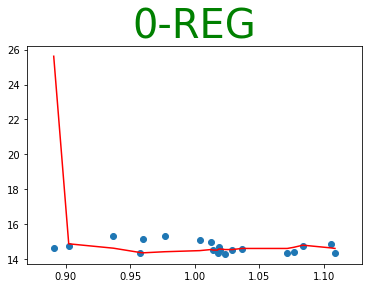

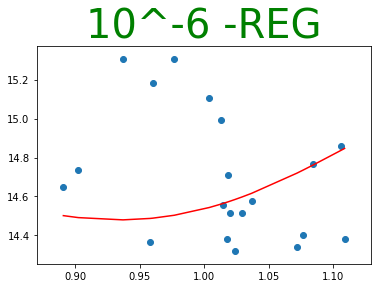

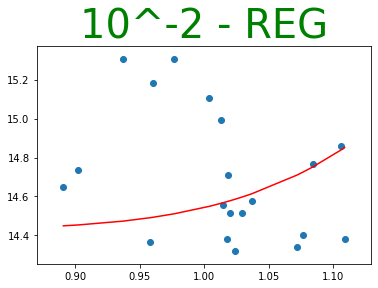

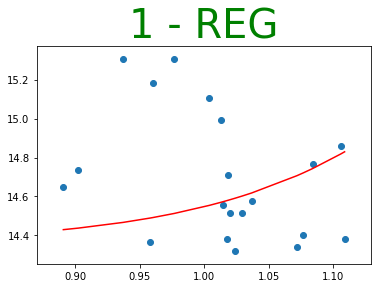

In [507]:

tenth_degree = PolynomialFeatures(degree=10)
X_ten_train= tenth_degree.fit_transform(X_train_p.reshape(-1,1))
X_ten_test = tenth_degree.fit_transform(X_test_p.reshape(-1,1))
reg_factor = [0,10e-6,10e-2,1]
pred_values = {} 
for alpha in reg_factor:
    reg = Ridge(alpha=alpha)
    reg.fit(X_ten_train,y_train_p)
    pred = reg.predict(X_ten_test)
    pred_values[alpha] = pred.transpose()
    Ridge_train_score = reg.score(X_ten_train,y_train_p)
    Ridge_test_score = reg.score(X_ten_test , y_test_p)
    #print ("this is the train score = {}, test score = {}".format(Ridge_train_score,Ridge_test_score))
plt.title(label="0-REG", 
          fontsize=40, 
          color="green") 
plt.scatter(X_test_p,y_test_p )

lists = sorted(zip(*[X_test_p,pred_values[0] ]))
new_x, new_y = list(zip(*lists))

plt.plot(new_x,new_y , c='red')

plot2 = plt.figure(2) 
plt.title(label="10^-6 -REG", 
          fontsize=40, 
          color="green") 
plt.scatter(X_test_p,y_test_p)
lists = sorted(zip(*[X_test_p,pred_values[10e-6] ]))
new_x, new_y = list(zip(*lists))

plt.plot(new_x,new_y , c='red')

plot3 = plt.figure(3) 
plt.title(label="10^-2 - REG", 
          fontsize=40, 
          color="green") 
plt.scatter(X_test_p, y_test_p)
lists = sorted(zip(*[X_test_p,pred_values[10e-2] ]))
new_x, new_y = list(zip(*lists))

plt.plot(new_x,new_y , c='red')

plot4 = plt.figure(4) 
plt.title(label="1 - REG", 
          fontsize=40, 
          color="green") 
plt.scatter(X_test_p, y_test_p)
lists = sorted(zip(*[X_test_p,pred_values[1] ]))
new_x, new_y = list(zip(*lists))

plt.plot(new_x,new_y , c='red')
   


<b>Exercise 3 implment coordinate_descent <b>

In [341]:
def coordinate_descent(x,y,beta_initial,i_max = 100):
    
    beta_current = beta_initial
    beta_old = beta_initial
    history_beta = {}
    for i in range(i_max): 
        beta_old = beta_current.copy()
        history_beta[i] = beta_old
        for m in range (x.shape[1]):
             
             list_m_c =list(range(x.shape[1]))
             #print (list_m_c)   
             list_m_c.remove(m)
             #print(list_m_c)
             x_current = x[:,list_m_c]
             #print ('x_current_dim is{}'.format(x_current.shape))   
             b_current = beta_current[list_m_c]
             #print ('b_current_dim is{}'.format(x_current.shape))
             #print('y _shape is {}'.format(y.shape)) 
             x_m = x[:,m] 
             beta_current[m] = ((y-x_current@b_current).T@x_m)/(x_m.T@x_m)
             #if m == (x.shape[1]-1): 
                 #print("This is the value of beta {}".format(beta_current) )
        function_now = (y-x@beta_current).T @(y-x@beta_current)
        #print (function_now)
        #print(beta_old)
        #print(beta_current)
        #print(beta_initial)
        function_old = ((y-x@beta_old).T)@ (y-x@beta_old) 
        #print(function_old)
        if(function_old - function_now < 10**-8 ):
            print("it needed {} iterations to converge".format(i))
            #print(history_beta )
            return history_beta 
    #print (beta_current)        
    return history_beta   
    

<b> The soft_choose is the helper method when we use regularization <b>

In [266]:
def soft_choose(v1,v2):
    if v1 > v2:
        return v1-v2
    elif abs(v1) <= v2:
        return 0
    elif v1< (-1*v2):
        return v1+v2
    
    
                
         
    

<b>Coordinate method with regularizarion<b>

In [345]:
def coordinate_descent_reg(x,y,beta_initial,i_max = 100,reg_factor =0.5):
    beta_current = beta_initial
    beta_old = beta_initial
    history_beta = {}
    for i in range(i_max):
        
        beta_old = beta_current.copy()
        history_beta[i] = beta_old
        for m in range (x.shape[1]):
             list_m_c =list(range(x.shape[1]))
             #print (list_m_c)   
             list_m_c.remove(m)
             #print(list_m_c)
             x_current = x[:,list_m_c]
             #print ('x_current_dim is{}'.format(x_current.shape))   
             b_current = beta_current[list_m_c]
             #print ('b_current_dim is{}'.format(x_current.shape))
             #print('y _shape is {}'.format(y.shape)) 
             x_m = x[:,m] 
             first_variable = (y-x_current@b_current).T@x_m/(x_m.T@x_m)
             #value_x = x_m.T@x_m  
             #value_reg_factor = 0.5*reg_factor
             second_variable = (0.5*reg_factor)/(x_m.T@x_m)
            # print("this is the first variable {} ,second variable {}, value_x{},value_reg{}".format(first_variable, second_variable,value_x,value_reg_factor)) 
             beta_current[m] =  soft_choose(first_variable,second_variable)
             #if m == (x.shape[1]-1): 
                 #print("This is the value of beta {}".format(beta_current) )
                    
        function_now = (y-x@beta_current).T @(y-x@beta_current) + reg_factor*np.sum(np.absolute(beta_current))
        #print (function_now)
        #print(beta_old)
        #print(beta_current)
        #print(beta_initial)
        function_old = ((y-x@beta_old).T)@ (y-x@beta_old) + reg_factor*np.sum(np.absolute(beta_old))
        #print(function_old)
        if(function_old - function_now < 10**-8 ):
            print("it needed {} of iterations to converge".format(i))
            return history_beta 
    #print (beta_current)        
    return history_beta   
    

<b> We use the below method, to call one timefor the ordinary coordinate method and another for the regularized one <b>
    

In [94]:
X_train.insert(0, 'bias', 1)

it needed 73 iterations to converge
it needed 23 of iterations to converge


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
620,-0.011279,0.068019,-0.159011,0.610807,-0.243630,0.011958,1.992144,0.452130,-0.266301,-0.284052,-0.959946
1422,-0.757935,0.068019,-1.391037,-0.311225,-0.179889,2.210777,0.259374,-0.607566,0.510970,1.072824,0.916812
1092,-0.757935,0.068019,-0.929027,-0.382151,-0.137395,-0.561648,-0.926204,-1.036742,0.770060,-0.402042,1.010650
520,0.850247,-1.551552,1.124349,0.114328,0.011334,-0.083643,-0.409414,0.770039,0.705287,1.426792,-0.396918
1416,0.965118,-1.160621,1.637693,-0.240300,-0.222383,-1.230854,-0.956604,1.405857,-0.719708,0.718856,-0.772270


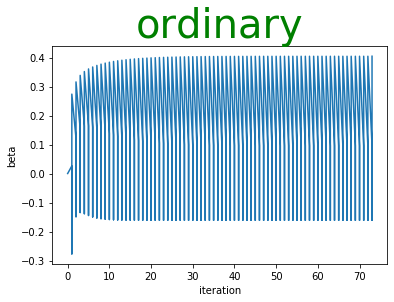

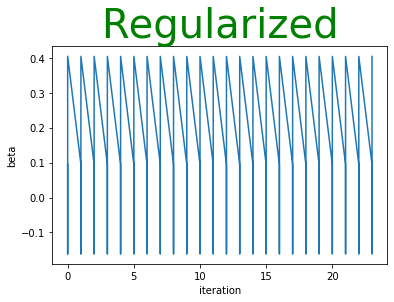

In [464]:
def learn_Coordinate_Descent(i_max =1000):
    X = X_train.values 
    Y = y_train.values
    Beta = np.zeros(X.shape[1])  
    beta_history_ord = coordinate_descent(X,Y,Beta)
    #print( beta_history_ord)
    Beta_history_reg = coordinate_descent_reg(X,Y,Beta)
    #print( Beta_history_reg)
    #plotting ----------------------------
    
    
    
    xs, ys=zip(*((x, k) for k in beta_history_ord for x in beta_history_ord[k]))
    #---sort------------------
    #lists = sorted(zip(*[ys,xs ]))
    #new_x, new_y = list(zip(*lists))
  
    plot1 = plt. figure(1) 
    plt.title(label="ordinary", 
          fontsize=40, 
          color="green") 
    plt.plot(ys, xs, label=i)
    plt.xlabel('iteration')
    plt.ylabel('beta')
   
    #-------plotting regularized----------------
    plot2 =  plt. figure(2)
    plt.title(label="Regularized", 
          fontsize=40, 
          color="green")
    
    
    x_s,y_s = zip(*((x, k) for k in Beta_history_reg for x in Beta_history_reg[k])) 
    
    
    plt.plot(y_s,x_s, label=x_s)
    plt.xlabel('iteration')
    plt.ylabel('beta')
    #plt.legend()
         
Beta = learn_Coordinate_Descent() 

X_train.head() 